
# 🩺 Predicting Diabetes Progression — Regression & Non-Parametric Models

### Author: Jose George  
**Objective:** Build and evaluate multiple regression models to predict *diabetes progression one year after baseline* using the Scikit-learn Diabetes dataset.

---


In [1]:

# ======================================================
# 📦 Import Required Libraries (All Declared Here)
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn utilities
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

from scipy import stats

# For consistent visuals
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline



# 🧩 Part 1 — Data Loading, Exploration & Preparation


In [2]:

# Load diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# Combine for EDA
df = pd.concat([X, y], axis=1)

# Dataset info
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



## 🔍 Exploratory Data Analysis (EDA)


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


Missing values per column:
age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64


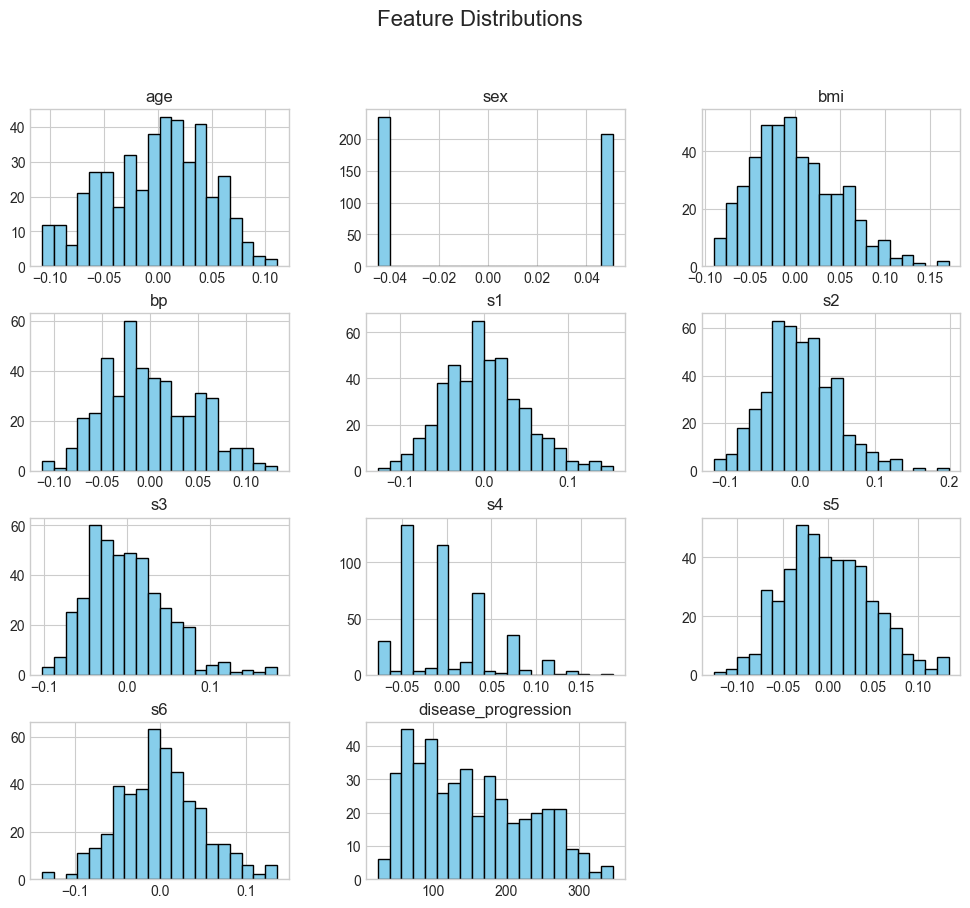

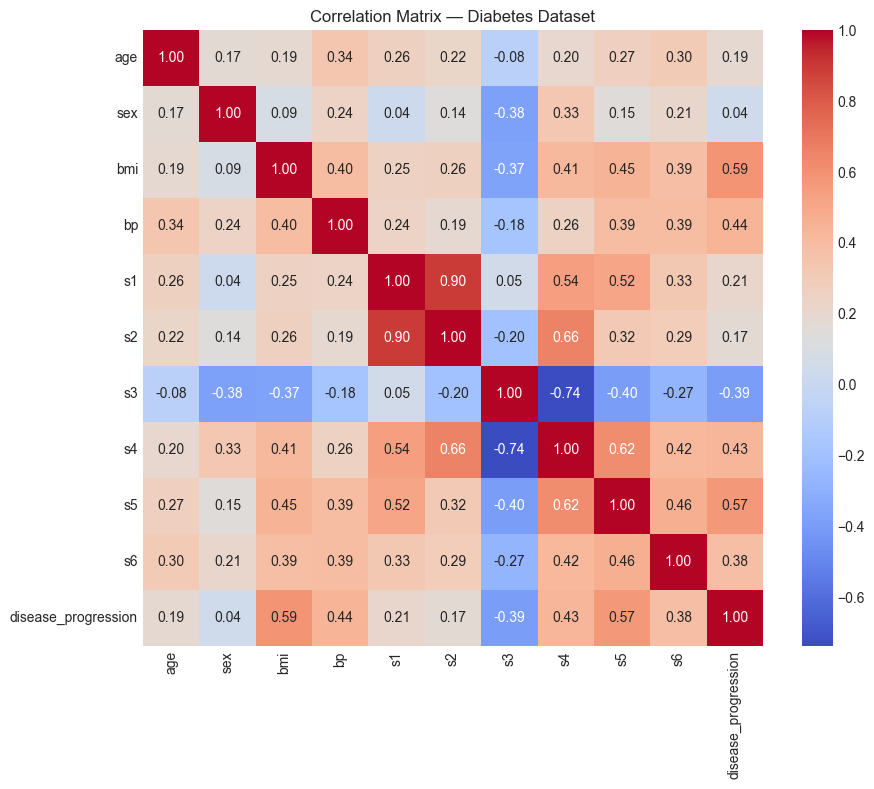

In [3]:

# Summary stats
display(df.describe().T)

# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Histograms
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix — Diabetes Dataset")
plt.show()



## 🔀 Train / Validation / Test Split


In [4]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (331, 10), Validation: (44, 10), Test: (67, 10)



# 🧮 Part 2 — Univariate Polynomial Regression (BMI vs Disease Progression)


In [5]:

X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
results = []

for degree in range(0, 6):
    if degree == 0:
        y_train_pred = np.full_like(y_train, fill_value=y_train.mean(), dtype=float)
        y_val_pred = np.full_like(y_val, fill_value=y_train.mean(), dtype=float)
    else:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_bmi)
        X_val_poly = poly.transform(X_val_bmi)
        model = LinearRegression().fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)

    results.append({
        "Degree": degree,
        "R2_Train": r2_score(y_train, y_train_pred),
        "R2_Val": r2_score(y_val, y_val_pred),
        "MAE_Train": mean_absolute_error(y_train, y_train_pred),
        "MAE_Val": mean_absolute_error(y_val, y_val_pred),
        "MAPE_Train": mean_absolute_percentage_error(y_train, y_train_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val, y_val_pred)
    })

results_df = pd.DataFrame(results)
display(results_df)

best_degree = int(results_df.sort_values(by='R2_Val', ascending=False).iloc[0]['Degree'])
print(f"🏆 Best polynomial degree: {best_degree}")


,Degree,R2_Train,R2_Val,MAE_Train,MAE_Val,MAPE_Train,MAPE_Val
0,0,0.000000,-0.106957,66.201641,66.057059,0.628267,0.712639
1,1,0.349672,0.331264,52.287739,47.208472,0.483629,0.470600
2,2,0.350764,0.331631,52.207314,47.213700,0.482985,0.472397
3,3,0.350774,0.331638,52.198968,47.185414,0.482807,0.472227
4,4,0.353014,0.340758,52.092653,46.090118,0.480533,0.460503
5,5,0.354100,0.349881,52.059191,45.462121,0.480040,0.451753


🏆 Best polynomial degree: 5



# 🧩 Part 3 — Multivariate and Non-Parametric Models


In [6]:

results_models = []

# Polynomial degrees 2 & 3
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    model = LinearRegression().fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    results_models.append({
        "Model": f"Polynomial (deg={degree})",
        "R2_Train": r2_score(y_train, y_train_pred),
        "R2_Val": r2_score(y_val, y_val_pred),
        "MAE_Val": mean_absolute_error(y_val, y_val_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val, y_val_pred)
    })

# Decision Trees
for depth in [3, 5]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    results_models.append({
        "Model": f"DecisionTree (depth={depth})",
        "R2_Train": r2_score(y_train, y_train_pred),
        "R2_Val": r2_score(y_val, y_val_pred),
        "MAE_Val": mean_absolute_error(y_val, y_val_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val, y_val_pred)
    })

# kNNs
for k in [3, 7]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    results_models.append({
        "Model": f"kNN (k={k})",
        "R2_Train": r2_score(y_train, y_train_pred),
        "R2_Val": r2_score(y_val, y_val_pred),
        "MAE_Val": mean_absolute_error(y_val, y_val_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val, y_val_pred)
    })

# Linear and Ridge
for model_name, model in [("LinearRegression", LinearRegression()), ("Ridge (α=1.0)", Ridge(alpha=1.0))]:
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    results_models.append({
        "Model": model_name,
        "R2_Train": r2_score(y_train, model.predict(X_train)),
        "R2_Val": r2_score(y_val, y_val_pred),
        "MAE_Val": mean_absolute_error(y_val, y_val_pred),
        "MAPE_Val": mean_absolute_percentage_error(y_val, y_val_pred)
    })

results_models_df = pd.DataFrame(results_models)
display(results_models_df.sort_values(by="R2_Val", ascending=False))


,Model,R2_Train,R2_Val,MAE_Val,MAPE_Val
0,Polynomial (deg=2),0.604815,0.426319,41.802033,0.422773
6,LinearRegression,0.519034,0.384874,41.830151,0.409529
7,Ridge (α=1.0),0.427302,0.364929,45.421715,0.458220
5,kNN (k=7),0.523312,0.359234,42.126623,0.395907
4,kNN (k=3),0.629300,0.214184,45.795455,0.442421
2,DecisionTree (depth=3),0.509503,0.198306,48.126248,0.476729
3,DecisionTree (depth=5),0.686693,0.093919,49.645483,0.481620
1,Polynomial (deg=3),0.909838,-43.279862,241.215317,2.312121



# 🧩 Part 4 — Test Evaluation & Visualization


🏆 Best Model Based on Validation: Polynomial (deg=2)
R² (Test): 0.3801
MAE (Test): 45.5614
MAPE (Test): 0.3784


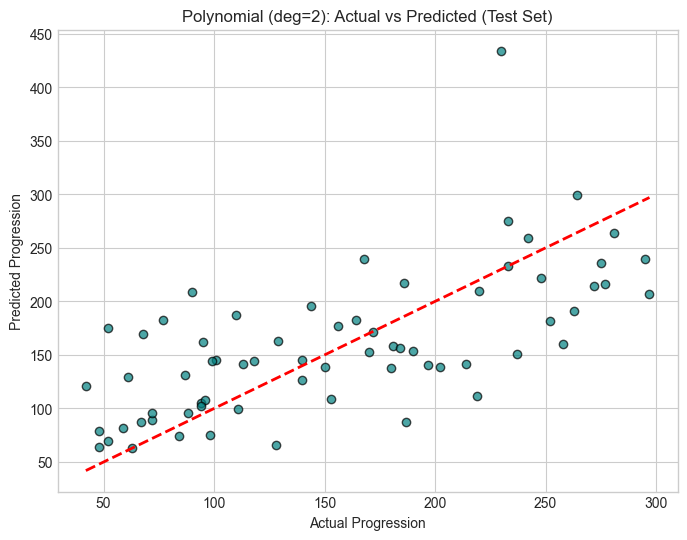

In [7]:

best_model_name = results_models_df.sort_values(by="R2_Val", ascending=False).iloc[0]["Model"]
print(f"🏆 Best Model Based on Validation: {best_model_name}")

X_trainval_full = pd.concat([X_train, X_val])
y_trainval_full = pd.concat([y_train, y_val])

def train_best_model(model_name):
    if "Polynomial" in model_name:
        degree = int(model_name.split("=")[-1].strip(")"))
        model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    elif "DecisionTree" in model_name:
        depth = int(model_name.split("=")[-1].strip(")"))
        model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    elif "kNN" in model_name:
        k = int(model_name.split("=")[-1].strip(")"))
        model = KNeighborsRegressor(n_neighbors=k)
    elif "Ridge" in model_name:
        model = Ridge(alpha=1.0)
    else:
        model = LinearRegression()
    return model

final_model = train_best_model(best_model_name)
final_model.fit(X_trainval_full, y_trainval_full)
y_test_pred = final_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"R² (Test): {r2_test:.4f}\nMAE (Test): {mae_test:.4f}\nMAPE (Test): {mape_test:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='teal', alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title(f"{best_model_name}: Actual vs Predicted (Test Set)")
plt.show()



# 🧩 Part 5 — Model Performance Visualization


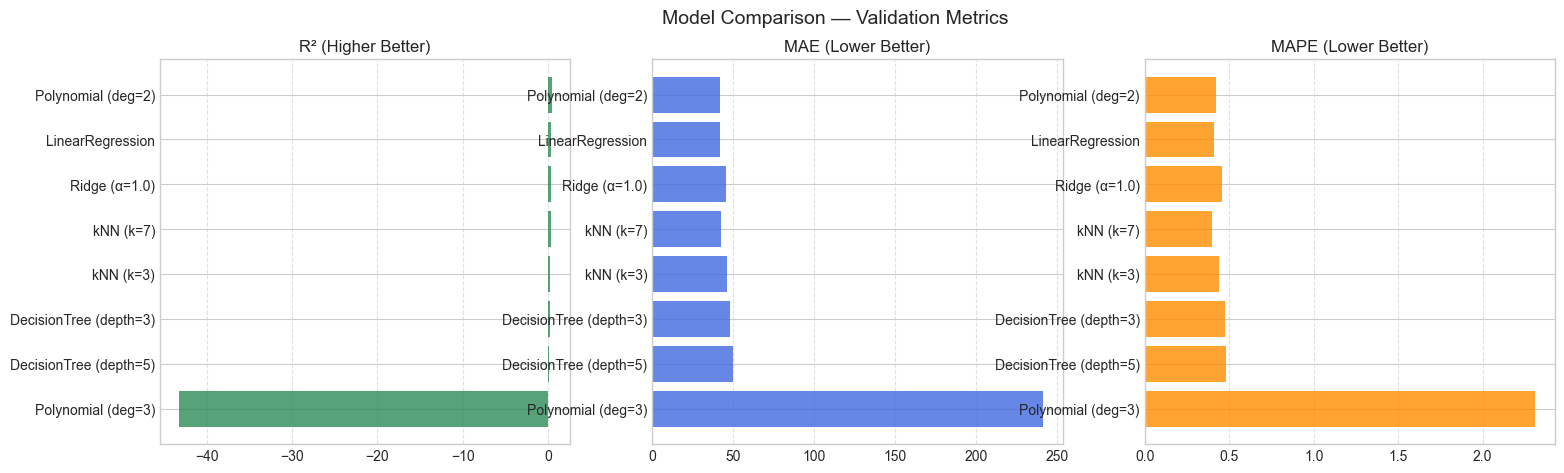

In [8]:

results_sorted = results_models_df.sort_values(by="R2_Val", ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18,5))
axes = axes.ravel()

metrics = [("R2_Val", "R² (Higher Better)", "seagreen"),
           ("MAE_Val", "MAE (Lower Better)", "royalblue"),
           ("MAPE_Val", "MAPE (Lower Better)", "darkorange")]

for ax, (metric, title, color) in zip(axes, metrics):
    ax.barh(results_sorted["Model"], results_sorted[metric], color=color, alpha=0.8)
    ax.set_title(title)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.suptitle("Model Comparison — Validation Metrics", fontsize=14)
plt.show()
